In [1]:
import pandas as pd

In [2]:
# List of CSV files to merge
file_paths = [r"C:\Users\hp\Downloads\Sales file\Sales_January_2019.csv",
              r"C:\Users\hp\Downloads\Sales file\Sales_February_2019.csv",
              r"C:\Users\hp\Downloads\Sales file\Sales_March_2019.csv",
              r"C:\Users\hp\Downloads\Sales file\Sales_April_2019.csv",
              r"C:\Users\hp\Downloads\Sales file\Sales_May_2019.csv",
              r"C:\Users\hp\Downloads\Sales file\Sales_June_2019.csv",
              r"C:\Users\hp\Downloads\Sales file\Sales_July_2019.csv",
              r"C:\Users\hp\Downloads\Sales file\Sales_August_2019.csv",
              r"C:\Users\hp\Downloads\Sales file\Sales_September_2019.csv",
              r"C:\Users\hp\Downloads\Sales file\Sales_October_2019.csv",
              r"C:\Users\hp\Downloads\Sales file\Sales_November_2019.csv",
              r"C:\Users\hp\Downloads\Sales file\Sales_December_2019.csv"]

#Create a list to hold individual DataFrames
dfs = []

#Read each CSV file into a DataFrame and append it to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate the DataFrames along the rows (axis=0)
merged_df = pd.concat(dfs, axis=0, ignore_index=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_file.csv', index=False)


In [3]:
merged_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [4]:
#always remember whenever you want to export a file directly to desktop
import os
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")


In [5]:
merged_df.to_csv(os.path.join(desktop_path, 'sales_file.csv'), index=False)


In [6]:
sales_file=pd.read_csv(r"C:\Users\hp\Desktop\sales_file.csv")

## now we will start doing some analysis to it

In [7]:
# Question 1:what was the best month for sales? How much was earned in that month?

In [8]:
#for that we need to add a saperate month column and sales column inorder to get the true picture


In [9]:
sales_file['Month']=sales_file['Order Date'].str[0:2] 
#what happened here is that we took the order date column and sliced it and took the only first two indices, also remember that 2 is exclusive here

##Now we start cleaning the data

In [10]:
#so the back story is when i decided to change the month column to int it said that "cannot convert float NaN to integer" so now we need to erase all the Nan from our dataframe

In [11]:
#cleaning the null values and for that we need o point those out before we could drop them
nan_df=sales_file[sales_file.isna().any(axis=1)]
nan_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
sales_file = sales_file.dropna(how='all')


In [13]:
#this is the data with the faulty values or values with or
faulty_data=sales_file[sales_file['Order Date'].str[0:2]== 'Or']
faulty_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [14]:
sales_file=sales_file[sales_file['Order Date'].str[0:2]!= 'Or']

In [15]:
sales_file['Month']=sales_file['Month'].astype('int32')

NOW BACK TO OUR QUESTION, WHAT WAS THE BEST MONTH FOR SALES AND HOW MUCH WAS EARNED IN IT?
but as we encountered another problem as all the datatypes of our columns were not int so we need to first convert them into integer values and for that we are using (to_numeric) function

In [16]:
sales_file['Quantity Ordered']=pd.to_numeric(sales_file['Quantity Ordered'])
sales_file['Price Each']=pd.to_numeric(sales_file['Price Each'])

In [17]:
#Now that we have added the month column we are now going to add the sales column
sales_file['Sales']=sales_file['Quantity Ordered']*sales_file['Price Each']

In [18]:
sales_file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [19]:
#sales_file.groupby('Month').sum()
sales_per_month = sales_file.groupby('Month').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'sum',
    'Sales': 'sum'
})

In [20]:
sales_per_month

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


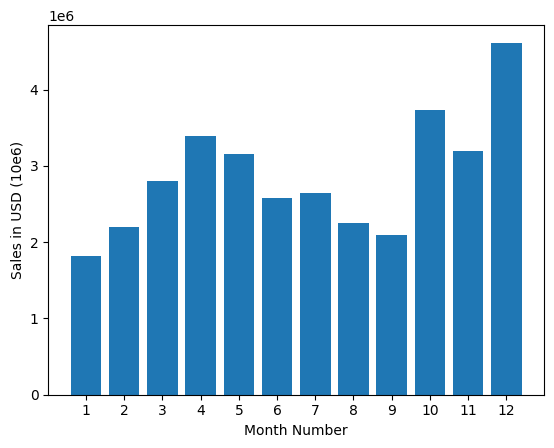

In [21]:
import matplotlib.pyplot as plt
month=range(1,13)
plt.bar(month,sales_per_month['Sales'])
plt.xticks(month)
plt.xlabel('Month Number')
plt.ylabel( 'Sales in USD (10e6)')
plt.show()

In [22]:
#question no 2: what city had the highest number of sales and for that we need a saperate city column from our address column



In [23]:
sales_file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [24]:
#sales_by_city=sales_file.groupby('').sum()
#sales_per_month = sales_file.groupby('Month').agg({
    #'Quantity Ordered': 'sum',
   # 'Price Each': 'sum',
    #'Sales': 'sum'
#})

In [25]:
#add a city column to the dataframe but if we look at the dataframe the city is entrapped in the entire address so we need to split that from the string first.
#for that we need to use the .apply() method
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

sales_file['City']=sales_file['Purchase Address'].apply(lambda x:get_city(x)+' ('+get_state(x))+ ')'
sales_file


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco (CA)
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles (CA)
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle (WA)
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas (TX)


In [26]:
#question no 2: what city had the highest number of sales and for that we need a saperate city column from our address column



In [27]:
#sales_file.groupby('Month').sum()
sales_by_city = sales_file.groupby('City').agg({
    'Sales': 'sum'
})

In [28]:
sales_by_city

,Sales
City,
Atlanta (GA),2795498.58
Austin (TX),1819581.75
Boston (MA),3661642.01
Dallas (TX),2767975.40
Los Angeles (CA),5452570.80
New York City (NY),4664317.43
Portland (ME),449758.27
Portland (OR),1870732.34
San Francisco (CA),8262203.91


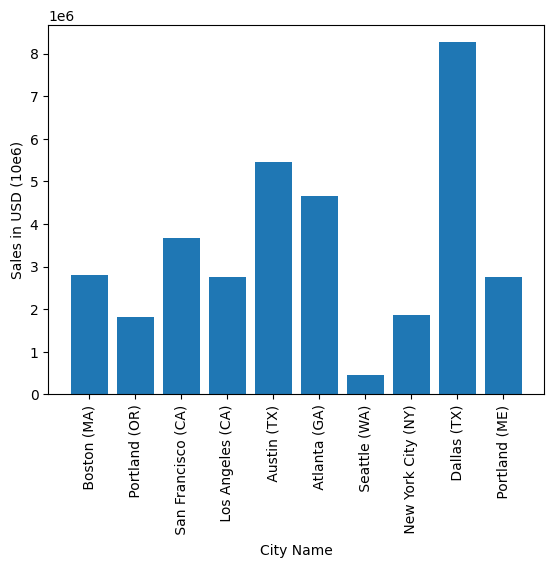

In [29]:
import matplotlib.pyplot as plt
cities= sales_file['City'].unique()
plt.bar(cities,sales_by_city['Sales'])
plt.xticks(cities,rotation='vertical')
plt.xlabel('City Name')
plt.ylabel( 'Sales in USD (10e6)')
plt.show()
#now as there is a discrepency in the table or calculation made above and the visukization below as the calculation shows San francisco being the city with most sales while the graph below show dallas thus we need to do some list comprehension here....
#i will be writing the same code and but with some list comprehension this time.

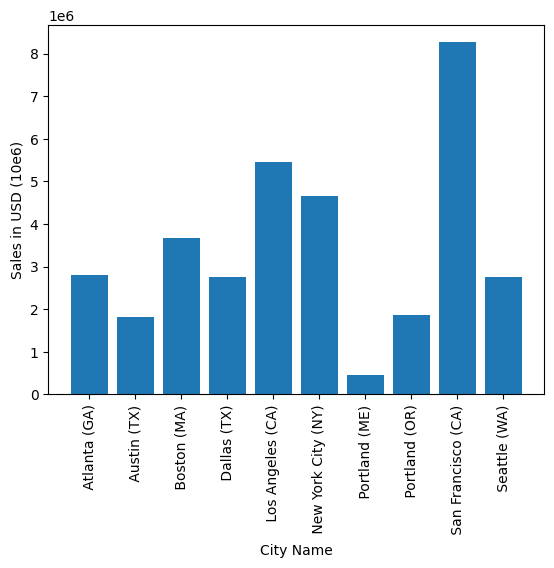

In [30]:
cities = [city for city,df in sales_file.groupby('City')]
plt.bar(cities,sales_by_city['Sales'])
plt.xticks(cities,rotation='vertical')
plt.xlabel('City Name')
plt.ylabel( 'Sales in USD (10e6)')
plt.show()

what time should we display advertisement to maximize likelihood of customer's buying product?

In [31]:
sales_file.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


In [32]:
sales_file['Order Date']= pd.to_datetime(sales_file['Order Date'])
sales_file['Hour']=sales_file['Order Date'].dt.hour
sales_file['Minute']=sales_file['Order Date'].dt.minute
sales_file.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_1288\4173905139.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_file['Order Date']= pd.to_datetime(sales_file['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11,59


In [33]:
sales_by_hour= sales_file.groupby('Hour').agg({
    'Sales': 'sum'
})
sales_by_hour

,Sales
Hour,
0,713721.27
1,460866.88
2,234851.44
3,145757.89
4,162661.01
5,230679.82
6,448113.00
7,744854.12
8,1192348.97


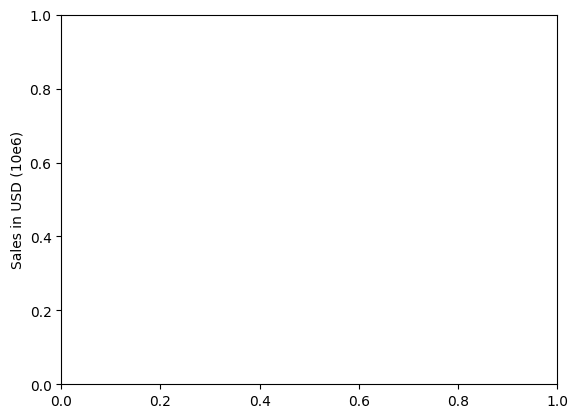

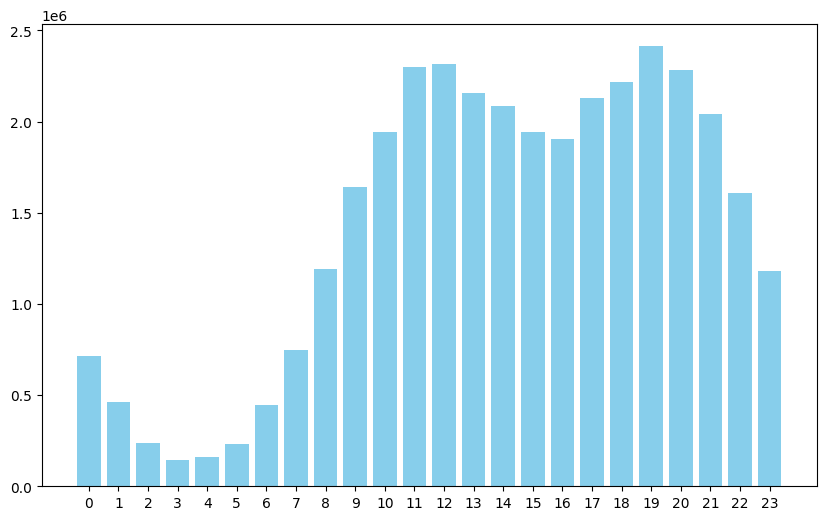

In [34]:
plt.ylabel( 'Sales in USD (10e6)')
plt.figure(figsize=(10, 6))
plt.bar(sales_by_hour.index, sales_by_hour['Sales'], color='skyblue')
plt.xticks(sales_by_hour.index)
plt.show()


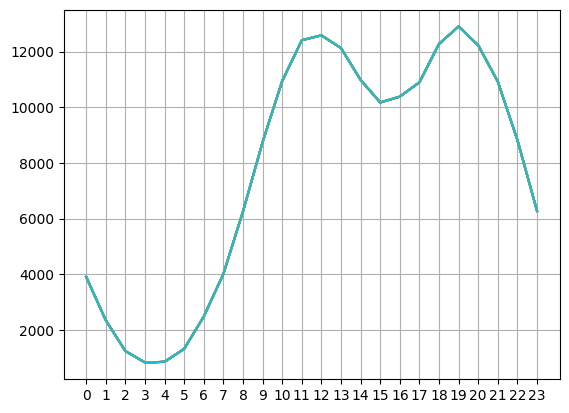

In [35]:
#Now another approach
Hours= [hour for hour,df in sales_file.groupby('Hour')]
sales_file.groupby(['Hour']).count()
plt.plot(Hours,sales_file.groupby(['Hour']).count())
plt.xticks(sales_by_hour.index)
plt.grid()

what products are most often sold together?

In [36]:
from itertools import combinations
from collections import Counter


In [37]:
df = sales_file[sales_file['Order ID'].duplicated(keep=False)]

df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

df.head(25)

C:\Users\hp\AppData\Local\Temp\ipykernel_1288\1534956563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin (TX),16,6,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin (TX),16,6,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles (CA),8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles (CA),8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City (NY),11,19,"Vareebadd Phone,Wired Headphones"
134,141365,Wired Headphones,1,11.99,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,11.99,New York City (NY),11,19,"Vareebadd Phone,Wired Headphones"
153,141384,Google Phone,1,600.00,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",1,600.00,Boston (MA),0,14,"Google Phone,USB-C Charging Cable"
154,141384,USB-C Charging Cable,1,11.95,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",1,11.95,Boston (MA),0,14,"Google Phone,USB-C Charging Cable"
220,141450,Google Phone,1,600.00,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",1,600.00,San Francisco (CA),11,16,"Google Phone,Bose SoundSport Headphones"
221,141450,Bose SoundSport Headphones,1,99.99,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",1,99.99,San Francisco (CA),11,16,"Google Phone,Bose SoundSport Headphones"


In [38]:
df=df[['Order ID','Grouped']].drop_duplicates()

df.head(25)

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
228,141457,"iPhone,Apple Airpods Headphones"
250,141478,"Google Phone,Apple Airpods Headphones"
323,141550,"iPhone,Apple Airpods Headphones,Wired Headphones"
362,141587,"USB-C Charging Cable,Apple Airpods Headphones"
421,141645,"Lightning Charging Cable,Wired Headphones"


In [39]:
count= Counter()

for row in df['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [40]:
count= Counter()
for row in df['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,3)))
    
for key,value in count.most_common(10):
    print(key,value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5


In [41]:
count= Counter()
for row in df['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,4)))
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Google Phone') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'Google Phone') 1
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', 'AA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1


In [42]:
count= Counter()
for row in df['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,5)))
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1


What product gave the most sales?

In [43]:
sales_by_product= sales_file.groupby('Product').agg({
    'Sales': 'sum'
})
sales_by_product

,Sales
Product,
20in Monitor,454148.71
27in 4K Gaming Monitor,2435097.56
27in FHD Monitor,1132424.50
34in Ultrawide Monitor,2355558.01
AA Batteries (4-pack),106118.40
AAA Batteries (4-pack),92740.83
Apple Airpods Headphones,2349150.00
Bose SoundSport Headphones,1345565.43
Flatscreen TV,1445700.00


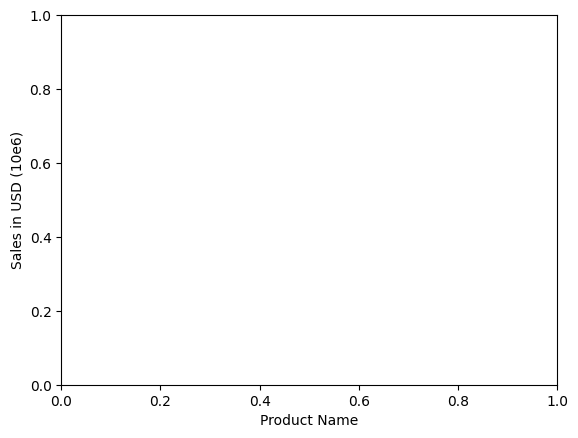

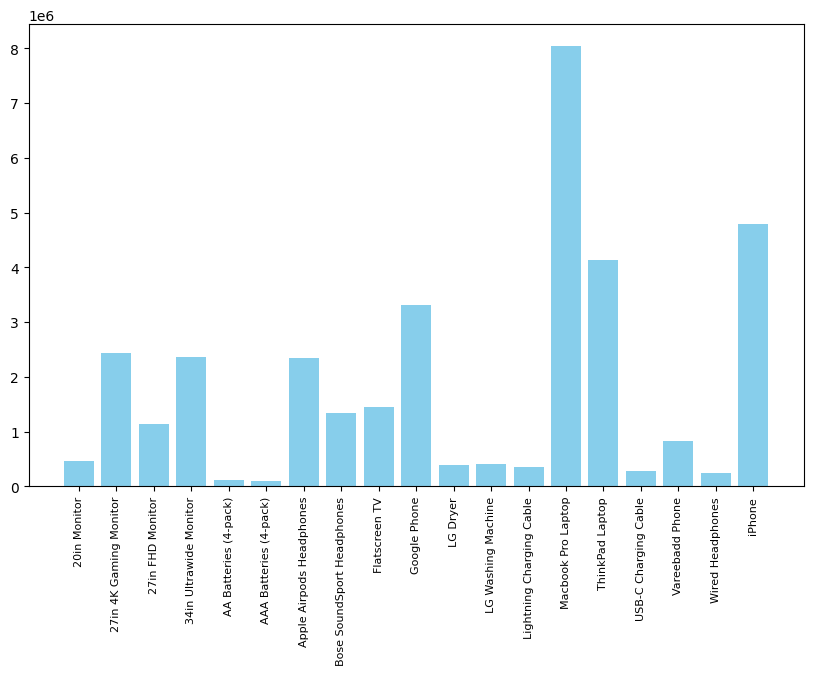

In [44]:
plt.xlabel( 'Product Name')
plt.ylabel( 'Sales in USD (10e6)')
plt.figure(figsize=(10, 6))
plt.bar(sales_by_product.index, sales_by_product['Sales'], color='skyblue')
plt.xticks(sales_by_product.index,rotation='vertical',size=8)
plt.show()


In [45]:
sales_file.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11,59


In [49]:
##what product sold the most?why do you think it sold the most?

sales_file['Quantity Ordered'] = pd.to_numeric(sales_file['Quantity Ordered'], errors='coerce')

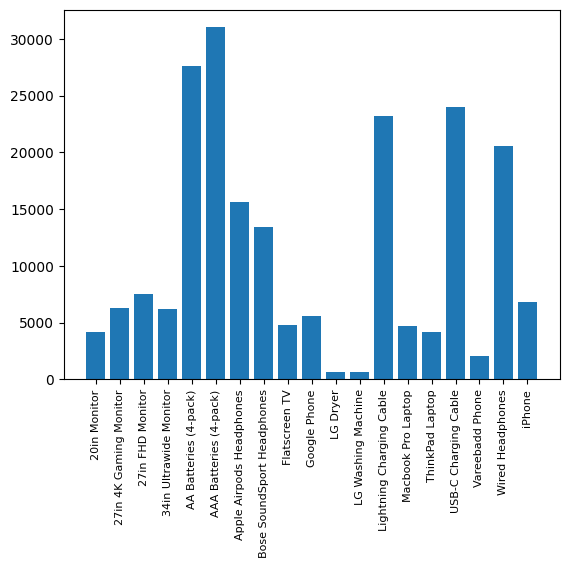

In [50]:
product_group = sales_file.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()  # Exclude 'Order Date' from sum operation

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()



C:\Users\hp\AppData\Local\Temp\ipykernel_1288\1903606236.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(keys, rotation='vertical', size=8)


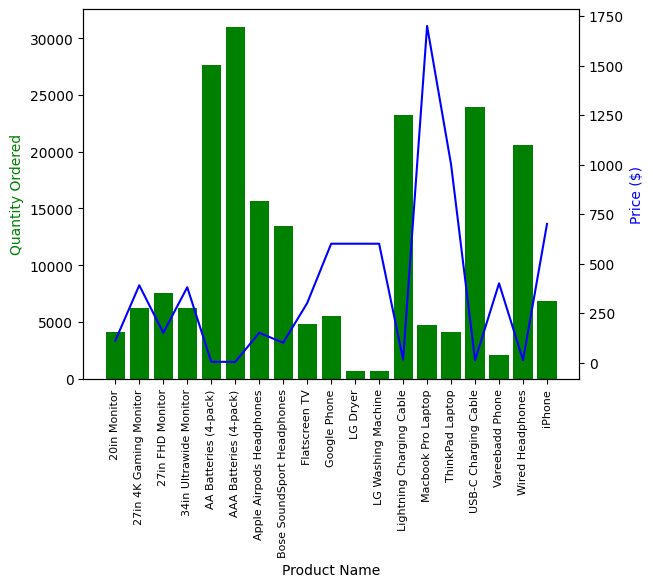

In [52]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

"""prices = sales_file.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()"""


sales_file['Quantity Ordered'] = pd.to_numeric(sales_file['Quantity Ordered'], errors='coerce')
sales_file['Price Each'] = pd.to_numeric(sales_file['Price Each'], errors='coerce')

product_group = sales_file.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()
prices = product_group['Price Each'].mean()

keys = [pair for pair, df in product_group]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

plt.show()